In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape) # 50000개 데이터 
print("x_train.shape[0]:", x_train.shape[0])
print("x_train.shape[0]/32:", x_train.shape[0]/32)
print("y_train.shape:", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
x_train.shape[0]: 50000
x_train.shape[0]/32: 1562.5
y_train.shape: (50000,)


In [4]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [9]:
print(x_train[0].shape) #하나의 이미지가 32x32 , rgb 이므로 3채널 .

(32, 32, 3)


In [11]:
# Build the model using the functional API
# input 
i = Input(shape=x_train[0].shape)

# Conv2D
x = Conv2D(32,(3,3), strides=2, activation='relu')(i)

# Conv2D
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)

# Conv2D
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)


# Flatten
x = Flatten()(x)

# Dropout
x = Dropout(0.5)(x)

# Dense(relu)
x = Dense(1024, activation='relu')(x) #dense 많아졌다 -> 가중치도 많아진다 -> 열심히 학습한다. 

# Dropout
x = Dropout(0.2)(x) #드롭아웃은 옵션사항. 

# Dense(softmax)
x = Dense(K, activation='softmax')(x)


model = Model(i,x)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1180

In [12]:
# Compile and fit
# Note: make sure you are using hte GPU for this!

# optimizer=adam, loss=categorical_crossentropy, metrics=accuracy 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy']) #sparse : categorical_crossentropy 를 거쳐서 나오는 값을 정수로 바꿔서 출력해라. 

result = model.fit(x_train, y_train,
                  validation_data=(x_test,y_test),
                   epochs=10)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 55s 1ms/sample - loss: 1.5698 - accuracy: 0.4276 - val_loss: 1.3321 - val_accuracy: 0.5187
Epoch 2/10
50000/50000 [==============================] - 51s 1ms/sample - loss: 1.2846 - accuracy: 0.5357 - val_loss: 1.1879 - val_accuracy: 0.5731
Epoch 3/10
50000/50000 [==============================] - 52s 1ms/sample - loss: 1.1524 - accuracy: 0.5846 - val_loss: 1.0431 - val_accuracy: 0.6255
Epoch 4/10
50000/50000 [==============================] - 51s 1ms/sample - loss: 1.0618 - accuracy: 0.6199 - val_loss: 1.0019 - val_accuracy: 0.6490
Epoch 5/10
50000/50000 [==============================] - 50s 999us/sample - loss: 0.9881 - accuracy: 0.6486 - val_loss: 0.9306 - val_accuracy: 0.6737
Epoch 6/10
50000/50000 [==============================] - 50s 999us/sample - loss: 0.9322 - accuracy: 0.6647 

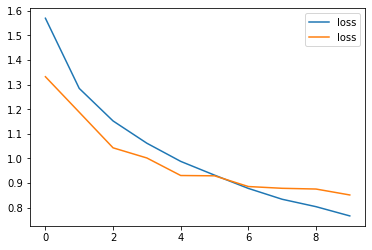

In [13]:
# Plot loss per iteration
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

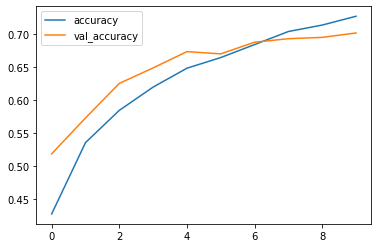

In [14]:
# Plot loss per iteration
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [15]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be appled by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("normalized confusion matrix")
  else:
    print('Consusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()



Consusion matrix, without normalization
[[759  25  29  25  22   2  12  12  88  26]
 [ 10 838   6  11   8   5  13   6  24  79]
 [ 74   8 539  88  80  75  87  22  21   6]
 [ 19  14  54 484  57 190 108  43  17  14]
 [ 22   3  64  68 640  51  73  62  15   2]
 [ 10   8  42 176  48 615  44  41   7   9]
 [  5   6  26  57  20  26 848   6   4   2]
 [ 16   3  26  51  72  55  17 747   7   6]
 [ 55  42   8  12   6   7   9   3 844  14]
 [ 37 133   7  29   8  16  15  21  28 706]]


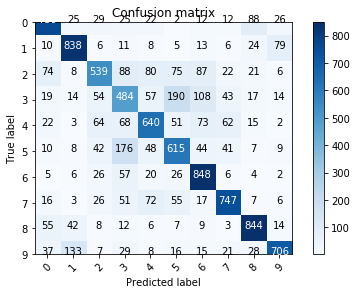

In [16]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [20]:
# Label mapping
labels = '''
airplane
automobile
bird
cat
deer
dog
horse
ship
truck
'''.split()

labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'horse',
 'ship',
 'truck']

(32, 32, 3)


Text(0.5, 1.0, 'True label:bird, Predicted label:airplane')

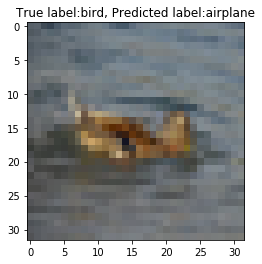

In [30]:
# Show some misclassified examples 왜 틀렸는지 뭘로 착각했는지 확인해보기

misclassified_idx = np.where(p_test != y_test)[0]
temp_idx = np.random.choice(misclassified_idx)

print(x_test[temp_idx].shape)
plt.imshow(x_test[temp_idx])

# 28,28, 1 일때는 <- 28,28로 바꿨지만, 애초에 컬러가 있는 이 파일은 reshape할 이유가 없음 

plt.title("True label:%s, Predicted label:%s" % (labels[y_test[temp_idx]],labels[p_test[temp_idx]]))